# フォロワー分析ツール
特定ユーザのフォロワーについて解析するツール。
フォロワーについて以下情報を解析
* フォロワー数
* ツイート数


ツイッターAPI接続、メソッド呼び出し


In [1]:
from requests_oauthlib import OAuth1Session
import json
import sys

json_ooath_key_dict = open("./config/twitter_config.json", "r")
oath_key_dict = json.load(json_ooath_key_dict)

def create_oath_session(oath_key_dict):
    oath = OAuth1Session(
    oath_key_dict["consumer_key"],
    oath_key_dict["consumer_secret"],
    oath_key_dict["access_token"],
    oath_key_dict["access_token_secret"]
    )
    return oath


# フォロワーリスト取得API実行
def get_follower_list(oath_key_dict, screen_name, cursor=-1):
    url = "https://api.twitter.com/1.1/followers/list.json?"
    params = {
        "screen_name": screen_name,
        "cursor": cursor,
        "skip_status": "true",
        "include_user_entities": "false",
        "count": 200
        }
    oath = create_oath_session(oath_key_dict)
    response = oath.get(url, params = params)
    if response.status_code != 200:
        print("Error code: %d" %(response.status_code))
        return None

    file_name = "./data/" + str(screen_name) + "_" + str(cursor) + ".json"
    f = open(file_name, 'w')
    f.writelines(response.text)
    f.close()

    followers = json.loads(response.text)
    return followers

# フォロワーリスト取得
def get_followers(screen_name):
    followers_array = []

    followers = get_follower_list(oath_key_dict, screen_name)
    
    if followers == None:
        print("couldn't get followers")
    
    else:
        print("call twitter API : followers/list")
        followers_array.append(followers)
            
        # 1リクエストで取得しきらない場合、再帰的に取得
        while followers["next_cursor"] != 0:
            followers = get_follower_list(oath_key_dict, screen_name, cursor=followers["next_cursor"])

            print("call twitter API : followers/list(" + followers["next_cursor"] + ")")
            followers_array.append(followers)
        
    return followers_array

解析対象ユーザ名を指定し、API実行


In [2]:
# Functions

counter = 0

followers_array = get_followers("arxivtimes")

if len(followers_array) == 0:
    print("No followers")
    sys.exit(1)

Error code: 429
couldn't get followers
No followers


SystemExit: 1

/Users/smap3/PycharmProjects/twitter_analyze/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [14]:
len(followers_array)

10

API上限により複数回リクエストを行っているので、結果を集約



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(columns=['name', 'followers_count'])

for followers in followers_array:
    for follower in followers["users"]:
        name = follower["name"]
        screen_name = follower["screen_name"]
        followers_count = follower["followers_count"]
        friends_count = follower["friends_count"]
        
        df = df.append(pd.DataFrame({'name': [name], 'followers_count': [followers_count],\
                                     'friends_count': friends_count}), ignore_index=True)
        counter += 1

フォロワー数の降順で結果を表示



In [10]:
df = df.sort_values(by='followers_count', ascending=False)
print(df.shape)
df.head(20)

(1966, 3)


,followers_count,friends_count,name
0,147789,1363.0,Jun Rekimoto : 暦本純一
0,25499,619.0,Naoya Ito
0,20473,861.0,尻P(野尻抱介)
0,16763,4298.0,グノシー
0,16607,633.0,Satoshi Hanano
0,13356,100.0,山本一成@Ponanza電王
0,13141,13716.0,三宅陽一郎MiyakeYouichiro
0,10689,5233.0,akausagi
0,8377,6970.0,paginejoker
0,7061,5832.0,くまぎ


結果をプロット


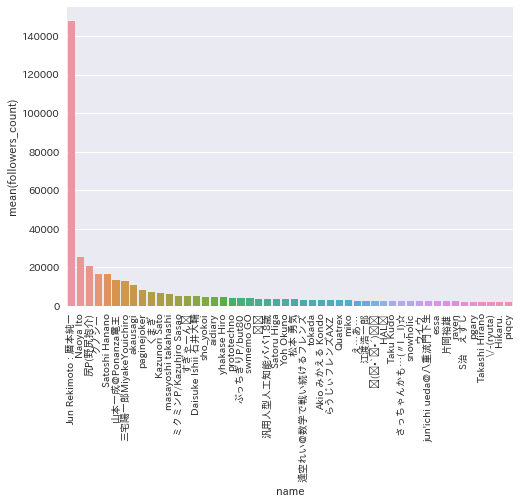

In [9]:
sns.set(font="IPAexGothic")

plot = sns.barplot(x='name', y='followers_count', data=df.head(50))

for item in plot.get_xticklabels():
    item.set_rotation(90)

sns.plt.show()

# save plot
fig = plot.get_figure()
fig.tight_layout()
fig.savefig('followers.png', dpi=100, figsize=(8, 10))